In [1]:
from contour import *
from fourier import *
import cv2
import random as rng
import matplotlib.pyplot as plt 
import matplotlib as mpl 
from symfit import parameters, variables, sin, cos, Fit
from tqdm import trange
import sympy
%matplotlib inline

In [2]:
src = cv2.imread(cv2.samples.findFile("test2.jpg"))
threshold = 50
contours, contours_simple = find_egg_contour(src.copy(), threshold)
for i in range(len(contours)):
    color = (rng.randint(0, 256), rng.randint(0, 256), rng.randint(0, 256))
    cv2.drawContours(src, contours, i, color, thickness=2, lineType=cv2.LINE_AA)

source_window = 'Contours'
cv2.namedWindow(source_window)
cv2.imshow(source_window, src)
cv2.waitKey()
cv2.destroyAllWindows()

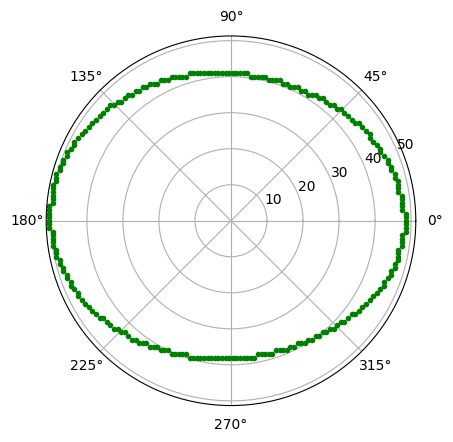

In [3]:
contours = np.array(contours)
_, length, _, coor = contours.shape
contours = contours.reshape((length, coor))
contours = transform2world(contours, src_img=src)
radius, radiances = cart2pol(contours[:, 0], contours[:, 1])

plt.axes(projection = 'polar') 
plt.polar(radiances, radius, 'g.') 

100%|██████████| 28/28 [01:14<00:00,  2.67s/it]


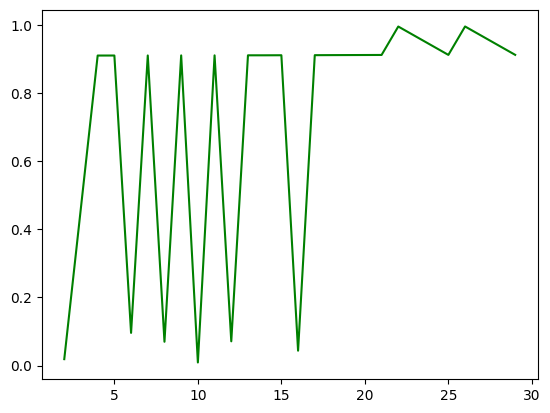

In [4]:
def fourier_series(phi, w, n=0):
    """
    Returns a symbolic fourier series of order `n`.

    :param n: Order of the fourier series.
    :param x: Independent variable
    :param f: Frequency of the fourier series
    """
    # Make the parameter objects for all the terms
    a0, *cos_a = parameters(','.join([f'a{i}' for i in range(0, n + 1)]))
    sin_b = parameters(','.join([f'b{i}' for i in range(1, n + 1)]))
    series = a0 + sum(ai * cos(i * w * phi) + bi * sin(i * w * phi) for i, (ai, bi) in enumerate(zip(cos_a, sin_b), start=1))
    return series

r, phi = variables('r, phi')
x, y = sympy.symbols('x, y')
w, = parameters('w')

num_term = []
r_sqaure = []
fit_func = None
fit_para = None
fit_model = None
max_r = 0
for i in trange(2, 30):
    model_dict = {r: fourier_series(phi, w=w, n=i)}
    fit = Fit(model_dict, phi=radiances, r=radius)
    fit_result = fit.execute(options={'gtol': 1e-5})
    if 'successfully' in fit_result.status_message:
        num_term.append(i)
        r_square_value = fit_result.gof_qualifiers['r_squared']
        r_sqaure.append(r_square_value)
        if r_square_value > max_r:
            max_r = r_square_value
            fit_func = fit
            fit_para = fit_result.params
            fit_model = model_dict

plt.plot(num_term, r_sqaure, color='green', ls='-')

In [5]:
r = fit_model[r]
r

a0 + a1*cos(w*phi) + a10*cos(10*w*phi) + a11*cos(11*w*phi) + a12*cos(12*w*phi) + a13*cos(13*w*phi) + a14*cos(14*w*phi) + a15*cos(15*w*phi) + a16*cos(16*w*phi) + a17*cos(17*w*phi) + a18*cos(18*w*phi) + a19*cos(19*w*phi) + a2*cos(2*w*phi) + a20*cos(20*w*phi) + a21*cos(21*w*phi) + a22*cos(22*w*phi) + a23*cos(23*w*phi) + a24*cos(24*w*phi) + a25*cos(25*w*phi) + a26*cos(26*w*phi) + a3*cos(3*w*phi) + a4*cos(4*w*phi) + a5*cos(5*w*phi) + a6*cos(6*w*phi) + a7*cos(7*w*phi) + a8*cos(8*w*phi) + a9*cos(9*w*phi) + b1*sin(w*phi) + b10*sin(10*w*phi) + b11*sin(11*w*phi) + b12*sin(12*w*phi) + b13*sin(13*w*phi) + b14*sin(14*w*phi) + b15*sin(15*w*phi) + b16*sin(16*w*phi) + b17*sin(17*w*phi) + b18*sin(18*w*phi) + b19*sin(19*w*phi) + b2*sin(2*w*phi) + b20*sin(20*w*phi) + b21*sin(21*w*phi) + b22*sin(22*w*phi) + b23*sin(23*w*phi) + b24*sin(24*w*phi) + b25*sin(25*w*phi) + b26*sin(26*w*phi) + b3*sin(3*w*phi) + b4*sin(4*w*phi) + b5*sin(5*w*phi) + b6*sin(6*w*phi) + b7*sin(7*w*phi) + b8*sin(8*w*phi) + b9*sin(9*w*ph

In [6]:
x = r * sympy.cos(phi)
x

(a0 + a1*cos(w*phi) + a10*cos(10*w*phi) + a11*cos(11*w*phi) + a12*cos(12*w*phi) + a13*cos(13*w*phi) + a14*cos(14*w*phi) + a15*cos(15*w*phi) + a16*cos(16*w*phi) + a17*cos(17*w*phi) + a18*cos(18*w*phi) + a19*cos(19*w*phi) + a2*cos(2*w*phi) + a20*cos(20*w*phi) + a21*cos(21*w*phi) + a22*cos(22*w*phi) + a23*cos(23*w*phi) + a24*cos(24*w*phi) + a25*cos(25*w*phi) + a26*cos(26*w*phi) + a3*cos(3*w*phi) + a4*cos(4*w*phi) + a5*cos(5*w*phi) + a6*cos(6*w*phi) + a7*cos(7*w*phi) + a8*cos(8*w*phi) + a9*cos(9*w*phi) + b1*sin(w*phi) + b10*sin(10*w*phi) + b11*sin(11*w*phi) + b12*sin(12*w*phi) + b13*sin(13*w*phi) + b14*sin(14*w*phi) + b15*sin(15*w*phi) + b16*sin(16*w*phi) + b17*sin(17*w*phi) + b18*sin(18*w*phi) + b19*sin(19*w*phi) + b2*sin(2*w*phi) + b20*sin(20*w*phi) + b21*sin(21*w*phi) + b22*sin(22*w*phi) + b23*sin(23*w*phi) + b24*sin(24*w*phi) + b25*sin(25*w*phi) + b26*sin(26*w*phi) + b3*sin(3*w*phi) + b4*sin(4*w*phi) + b5*sin(5*w*phi) + b6*sin(6*w*phi) + b7*sin(7*w*phi) + b8*sin(8*w*phi) + b9*sin(9*w*p

In [7]:
y = r * sympy.sin(phi)
y

(a0 + a1*cos(w*phi) + a10*cos(10*w*phi) + a11*cos(11*w*phi) + a12*cos(12*w*phi) + a13*cos(13*w*phi) + a14*cos(14*w*phi) + a15*cos(15*w*phi) + a16*cos(16*w*phi) + a17*cos(17*w*phi) + a18*cos(18*w*phi) + a19*cos(19*w*phi) + a2*cos(2*w*phi) + a20*cos(20*w*phi) + a21*cos(21*w*phi) + a22*cos(22*w*phi) + a23*cos(23*w*phi) + a24*cos(24*w*phi) + a25*cos(25*w*phi) + a26*cos(26*w*phi) + a3*cos(3*w*phi) + a4*cos(4*w*phi) + a5*cos(5*w*phi) + a6*cos(6*w*phi) + a7*cos(7*w*phi) + a8*cos(8*w*phi) + a9*cos(9*w*phi) + b1*sin(w*phi) + b10*sin(10*w*phi) + b11*sin(11*w*phi) + b12*sin(12*w*phi) + b13*sin(13*w*phi) + b14*sin(14*w*phi) + b15*sin(15*w*phi) + b16*sin(16*w*phi) + b17*sin(17*w*phi) + b18*sin(18*w*phi) + b19*sin(19*w*phi) + b2*sin(2*w*phi) + b20*sin(20*w*phi) + b21*sin(21*w*phi) + b22*sin(22*w*phi) + b23*sin(23*w*phi) + b24*sin(24*w*phi) + b25*sin(25*w*phi) + b26*sin(26*w*phi) + b3*sin(3*w*phi) + b4*sin(4*w*phi) + b5*sin(5*w*phi) + b6*sin(6*w*phi) + b7*sin(7*w*phi) + b8*sin(8*w*phi) + b9*sin(9*w*p

In [8]:
def curvature(x, y):
    dx_dphi = sympy.diff(x, phi)
    dy_dphi = sympy.diff(y, phi)
    d2x_dphi2 = sympy.diff(dx_dphi, phi)
    d2y_dphi2 = sympy.diff(dy_dphi, phi)
    R = sympy.sqrt(dx_dphi**2 + dx_dphi**2)**3 / abs(dx_dphi * d2y_dphi2 - dy_dphi * d2x_dphi2)
    return R
R = curvature(x, y)
R

2*sqrt(2)*((a1*w*sin(w*phi) + 10*a10*w*sin(10*w*phi) + 11*a11*w*sin(11*w*phi) + 12*a12*w*sin(12*w*phi) + 13*a13*w*sin(13*w*phi) + 14*a14*w*sin(14*w*phi) + 15*a15*w*sin(15*w*phi) + 16*a16*w*sin(16*w*phi) + 17*a17*w*sin(17*w*phi) + 18*a18*w*sin(18*w*phi) + 19*a19*w*sin(19*w*phi) + 2*a2*w*sin(2*w*phi) + 20*a20*w*sin(20*w*phi) + 21*a21*w*sin(21*w*phi) + 22*a22*w*sin(22*w*phi) + 23*a23*w*sin(23*w*phi) + 24*a24*w*sin(24*w*phi) + 25*a25*w*sin(25*w*phi) + 26*a26*w*sin(26*w*phi) + 3*a3*w*sin(3*w*phi) + 4*a4*w*sin(4*w*phi) + 5*a5*w*sin(5*w*phi) + 6*a6*w*sin(6*w*phi) + 7*a7*w*sin(7*w*phi) + 8*a8*w*sin(8*w*phi) + 9*a9*w*sin(9*w*phi) - b1*w*cos(w*phi) - 10*b10*w*cos(10*w*phi) - 11*b11*w*cos(11*w*phi) - 12*b12*w*cos(12*w*phi) - 13*b13*w*cos(13*w*phi) - 14*b14*w*cos(14*w*phi) - 15*b15*w*cos(15*w*phi) - 16*b16*w*cos(16*w*phi) - 17*b17*w*cos(17*w*phi) - 18*b18*w*cos(18*w*phi) - 19*b19*w*cos(19*w*phi) - 2*b2*w*cos(2*w*phi) - 20*b20*w*cos(20*w*phi) - 21*b21*w*cos(21*w*phi) - 22*b22*w*cos(22*w*phi) - 23*b

In [9]:
# TODO: Check upper and lower limit (seems not to be 0-pi)
def volume(r, phi, x):
    dx_dphi = sympy.diff(x, phi)
    V = sympy.pi * sympy.Integral(r * r * sympy.sin(phi) * sympy.sin(phi) * dx_dphi, (phi, 0, sympy.pi))
    return V
V = volume(r, phi, x)
V


pi*Integral(((-a1*w*sin(w*phi) - 10*a10*w*sin(10*w*phi) - 11*a11*w*sin(11*w*phi) - 12*a12*w*sin(12*w*phi) - 13*a13*w*sin(13*w*phi) - 14*a14*w*sin(14*w*phi) - 15*a15*w*sin(15*w*phi) - 16*a16*w*sin(16*w*phi) - 17*a17*w*sin(17*w*phi) - 18*a18*w*sin(18*w*phi) - 19*a19*w*sin(19*w*phi) - 2*a2*w*sin(2*w*phi) - 20*a20*w*sin(20*w*phi) - 21*a21*w*sin(21*w*phi) - 22*a22*w*sin(22*w*phi) - 23*a23*w*sin(23*w*phi) - 24*a24*w*sin(24*w*phi) - 25*a25*w*sin(25*w*phi) - 26*a26*w*sin(26*w*phi) - 3*a3*w*sin(3*w*phi) - 4*a4*w*sin(4*w*phi) - 5*a5*w*sin(5*w*phi) - 6*a6*w*sin(6*w*phi) - 7*a7*w*sin(7*w*phi) - 8*a8*w*sin(8*w*phi) - 9*a9*w*sin(9*w*phi) + b1*w*cos(w*phi) + 10*b10*w*cos(10*w*phi) + 11*b11*w*cos(11*w*phi) + 12*b12*w*cos(12*w*phi) + 13*b13*w*cos(13*w*phi) + 14*b14*w*cos(14*w*phi) + 15*b15*w*cos(15*w*phi) + 16*b16*w*cos(16*w*phi) + 17*b17*w*cos(17*w*phi) + 18*b18*w*cos(18*w*phi) + 19*b19*w*cos(19*w*phi) + 2*b2*w*cos(2*w*phi) + 20*b20*w*cos(20*w*phi) + 21*b21*w*cos(21*w*phi) + 22*b22*w*cos(22*w*phi) + 2

In [10]:
def surface(r, phi, x, y):
    dx_dphi = sympy.diff(x, phi)
    dy_dphi = sympy.diff(y, phi)
    S = 2 * sympy.pi * sympy.Integral(r * sympy.sin(phi) * dx_dphi * sympy.sqrt(dx_dphi * dx_dphi + dy_dphi * dy_dphi), (phi, 0, sympy.pi))
    return S
S = surface(r, phi, x, y)
S

2*pi*Integral(((-a1*w*sin(w*phi) - 10*a10*w*sin(10*w*phi) - 11*a11*w*sin(11*w*phi) - 12*a12*w*sin(12*w*phi) - 13*a13*w*sin(13*w*phi) - 14*a14*w*sin(14*w*phi) - 15*a15*w*sin(15*w*phi) - 16*a16*w*sin(16*w*phi) - 17*a17*w*sin(17*w*phi) - 18*a18*w*sin(18*w*phi) - 19*a19*w*sin(19*w*phi) - 2*a2*w*sin(2*w*phi) - 20*a20*w*sin(20*w*phi) - 21*a21*w*sin(21*w*phi) - 22*a22*w*sin(22*w*phi) - 23*a23*w*sin(23*w*phi) - 24*a24*w*sin(24*w*phi) - 25*a25*w*sin(25*w*phi) - 26*a26*w*sin(26*w*phi) - 3*a3*w*sin(3*w*phi) - 4*a4*w*sin(4*w*phi) - 5*a5*w*sin(5*w*phi) - 6*a6*w*sin(6*w*phi) - 7*a7*w*sin(7*w*phi) - 8*a8*w*sin(8*w*phi) - 9*a9*w*sin(9*w*phi) + b1*w*cos(w*phi) + 10*b10*w*cos(10*w*phi) + 11*b11*w*cos(11*w*phi) + 12*b12*w*cos(12*w*phi) + 13*b13*w*cos(13*w*phi) + 14*b14*w*cos(14*w*phi) + 15*b15*w*cos(15*w*phi) + 16*b16*w*cos(16*w*phi) + 17*b17*w*cos(17*w*phi) + 18*b18*w*cos(18*w*phi) + 19*b19*w*cos(19*w*phi) + 2*b2*w*cos(2*w*phi) + 20*b20*w*cos(20*w*phi) + 21*b21*w*cos(21*w*phi) + 22*b22*w*cos(22*w*phi) +

In [12]:
sub_symbols = dict(fit_para)
sub_values = {}
for symbol in R.free_symbols:
    if str(symbol) in sub_symbols.keys():
        sub_values[symbol] = sub_symbols[str(symbol)]
R = R.subs(sub_values)
R

2*sqrt(2)*((-1.58435103159591*sin(0.981453057992625*phi) + 9.40661897314024*sin(1.96290611598525*phi) + 1.21056750921424*sin(2.94435917397788*phi) + 1.8014938935531*sin(3.9258122319705*phi) + 0.226859991239182*sin(4.90726528996313*phi) + 0.219439605616631*sin(5.88871834795575*phi) - 0.0893652469496032*sin(6.87017140594838*phi) - 0.0317624582268039*sin(7.851624463941*phi) + 0.0561577252548626*sin(8.83307752193363*phi) + 0.536293804528764*sin(9.81453057992625*phi) - 0.320467613808207*sin(10.7959836379189*phi) + 0.12260013192035*sin(11.7774366959115*phi) - 0.17522254924962*sin(12.7588897539041*phi) + 0.727599615018063*sin(13.7403428118968*phi) - 0.28118283123026*sin(14.7217958698894*phi) + 0.0868947555075291*sin(15.703248927882*phi) + 0.259663844826972*sin(16.6847019858746*phi) + 0.567260896534731*sin(17.6661550438673*phi) - 0.246114775927344*sin(18.6476081018599*phi) + 0.6698126044575*sin(19.6290611598525*phi) + 0.861308930801487*sin(20.6105142178451*phi) + 1.45546805384166*sin(21.591967

In [13]:
R.free_symbols

{phi}

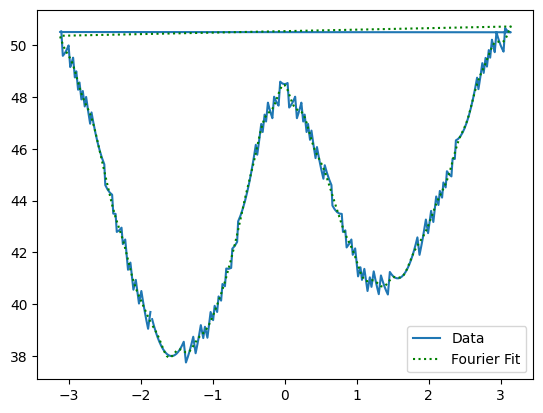

In [14]:
r_data = fit_func.model(phi=radiances, **fit_para).r
plt.plot(radiances, radius, label="Data")
plt.plot(radiances, r_data, color='green', ls=':', label="Fourier Fit")
plt.legend()

In [15]:
radii_curvature = []
for phi_value in radiances:
    radii_curvature.append(sympy.N(R.subs(phi, phi_value)))
radii_curvature

[257.910268541996,
 206.755365059027,
 133.026699703548,
 96.8058935473454,
 83.7813567185876,
 86.9943995971620,
 140.535879240618,
 346.837421763483,
 1640.72026522804,
 495.634579084700,
 17046.5285376042,
 261.420679510332,
 85.0745569469230,
 61.4887535400762,
 50.6928420893089,
 45.8767401441866,
 49.4656299729879,
 75.5445773457902,
 185.998200906733,
 338.074277402126,
 371.221590545933,
 230.243959210976,
 105.839227070108,
 70.0482622415658,
 59.6070500309349,
 58.5570559061020,
 58.1855530091105,
 52.0202028169283,
 38.1181654648883,
 25.2192897607466,
 16.9479955987041,
 12.4262779378016,
 10.9560341213645,
 11.1579103244978,
 16.9146892408889,
 36.0944094927144,
 270.335608001963,
 152.143313967649,
 57.8407921857396,
 18.4463924013534,
 7.87321361518030,
 4.66846319377794,
 2.67265255208472,
 1.80214290074186,
 1.34543238911825,
 1.24564945171735,
 1.77154242484668,
 6.40284822518356,
 8.91557365244189,
 13.5112520184750,
 3.44983826156173,
 0.925177912637127,
 0.08184756

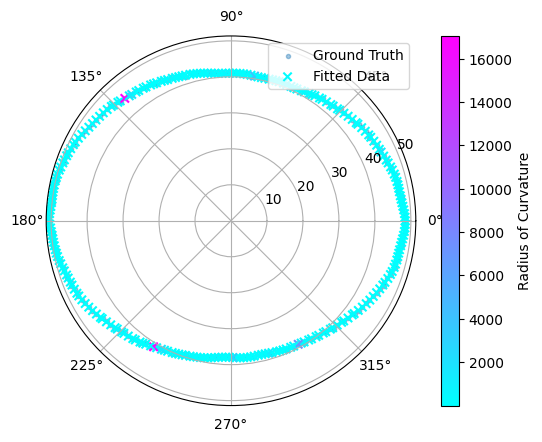

In [16]:
cmap = mpl.cm.cool
norm = mpl.colors.Normalize(vmin=min(radii_curvature), vmax=max(radii_curvature))

fig = plt.figure()
ax = fig.add_subplot(projection='polar')
ax.scatter(radiances, radius, marker='.', label='Ground Truth', alpha=0.4) 
ax.scatter(radiances, r_data, c=radii_curvature, cmap=cmap, marker='x', label='Fitted Data') 
ax.legend(loc="upper right")
fig.colorbar(
    mpl.cm.ScalarMappable(norm=norm, cmap=cmap), 
    ax=ax, orientation='vertical', label='Radius of Curvature'
)

In [17]:
V = V.subs(sub_values)
S = S.subs(sub_values)
print("Volume = ", sympy.N(V))
print("Surface Area = ", sympy.N(S))

Volume =  -345917.015613733
